Pydantic in Python

Pydantic is a data Validation library in python.

Benefits:                                                   
1.IDE Type Hints                                              
2.Data Validation                                             
3.JSON Serialization

In [35]:
from pydantic import BaseModel, EmailStr, field_validator

class User(BaseModel):
    name: str
    email: EmailStr
    account_id: int

    @field_validator("account_id", mode="before")
    @classmethod
    def validate_account_id(cls, value):
        if value <= 0:
            raise ValueError(f"Account id must be positive: {value}")
        return value

user = User(name="yash", email="yash@gmail.com", account_id=123)

user_data = {
    'name': 'Yash',
    'email': 'yash@gmail.com',
    'account_id': 12345
} #dictionary

user1 = User(**user_data) # creating instance from unpacking dictionary
print(user1)

name='Yash' email='yash@gmail.com' account_id=12345


In [36]:
# Data Validation

user2 = User(name="yash", email="yash@gmail.com", account_id="heelo") # here it comes validation error for account_id
print(user2)


TypeError: '<=' not supported between instances of 'str' and 'int'

In [37]:
# Data Validation for email

user3= User(name="yash", email="yashgmail.com", account_id=13) # here it comes validation error for email
print(user3)

ValidationError: 1 validation error for User
email
  value is not a valid email address: An email address must have an @-sign. [type=value_error, input_value='yashgmail.com', input_type=str]

In [38]:
# Custom Validation

# This will raise a validation error
user4 = User(name="yash", email="yash@gmail.com", account_id=-3)
print(user4)


ValidationError: 1 validation error for User
account_id
  Value error, Account id must be positive: -3 [type=value_error, input_value=-3, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/value_error

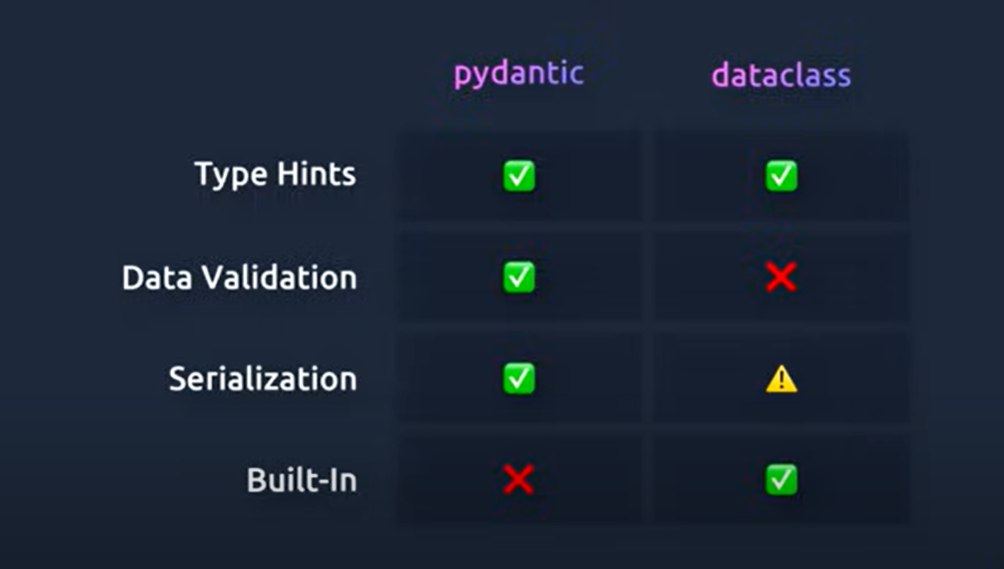

In [40]:
from IPython.display import Image, display

# Local image
display(Image(filename=r'C:\Users\HP\Desktop\IDC Python 30 Day Challenge\Python\Day 25\Screenshot 2025-06-21 101606.png'))

Challenge: Build a Pydantic model for a user profile with fields for name, email, and age, including validation for email format and age range (18–100)

In [46]:
class User_Profile(BaseModel):
    name: str
    email: EmailStr
    age: int

    @field_validator("age", mode="before")
    @classmethod
    def validate_age(cls, value):
        if not (18 <= value <= 100):
            raise ValueError(f"Age must be in range of (18-100): {value}")
        return value
    
user_profile = User_Profile(name="Yash", email="yash198@gmail.com", age=23)
print(f"Name: {user_profile.name}")
print(f"Email: {user_profile.email}")
print(f"Age: {user_profile.age}")


Name: Yash
Email: yash198@gmail.com
Age: 23
